<!-- Projeto desenvolvido por Fran Mateus - www.franmateus.com -->
# <font color='darkblue'>MODELOS DE CREDIT SCORING</font>

### **<font color='red'>1- ENTENDIMENTO DO NEGÓCIO</font>**

### **<font color='orange'>Objetivo do projeto:</font>**

Avaliar qual modelo de machine learning, dentre os seis abaixo, apresenta a melhor acurária na **classificação de risco** para concessão de novos créditos a partir de uma determinada base de clientes, usando a métrica de Acurácia como referência. 

### **<font color='orange'>Algoritmos a serem usados:</font>**

- Árvore de decisão
- Random Forest
- Bagging
- AdaBoost
- Extremely Randomized Forest
- Gradient Boosting
- LightGBM
- CatBoost

### **<font color='orange'>Base de dados:</font>**

O dataset utilizado chama-se **Default od Credit Cards** e foi disponibilizado pela UCI. Ele possui 1 coluna de identificação, 23 variáveis explicativas, 1 variável dependente binária e 30.000 observações (sem valores ausentes).

*Link para o dataset:* https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

#### **Variáveis:**

Target: 
- Default payment / Atraso no pagamento (Sim = 1, Não = 0)

Explicativas:
- Amount of given credit / Valor do crédito concedido (em dólar)
- Gender / Gênero (1 = masculino; 2 = feminino)
- Education / Educação (1 = graduado; 2 = estudante universitário; 3 = ensino médio; 4 = outros)
- Marital status / Status marital (1 = casado; 2 = solteiro; 3 = outros)
- Age / Idade (anos)
- History of past payment / Histórico de pagamentos (-1: pago em dia; 1: atraso de 1 mês; 2: atraso de 2 meses)
- Amount of bill statement / Valor faturado (Abril-Setembro; em dólar)
- Amount of previous payment / Valor pago (Abril-Setembro, em dólar)

### **<font color='red'>2- COLETA E EXPLORAÇÃO DOS DADOS</font>**

### **<font color='orange'>Bibliotecas/Frameworks:</font>**

In [1]:
# pip install ucimlrepo

In [2]:
# Coleta dos dados
from ucimlrepo import fetch_ucirepo

# Análise exploratória e tratamento dos dados
import pandas as pd
import numpy as np
import math

# Visualização dos dados
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Modelagem dos dados
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Avaliação dos modelos
#from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, precision_recall_curve, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, average_precision_score, log_loss, brier_score_loss
from scipy.stats import ks_2samp

import warnings
warnings.filterwarnings("ignore")

C:\Users\mfran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\mfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### **<font color='orange'>Leitura do dataset:</font>**

In [3]:
# Coletando os dados 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# Transformando num dataframe 
var_explicativas = default_of_credit_card_clients.data.features 
target = default_of_credit_card_clients.data.targets

### **<font color='orange'>Exploração dos dados:</font>**

In [4]:
var_explicativas.shape

(30000, 23)

In [5]:
var_explicativas.tail(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,50000,1,2,1,46,0,0,0,0,0,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [6]:
var_explicativas.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [7]:
target.shape

(30000, 1)

In [8]:
target.value_counts()

Y
0    23364
1     6636
dtype: int64

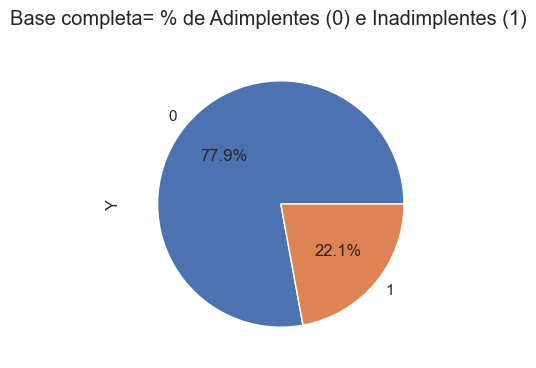

In [9]:
# Visualizando a variável Target: Adimplentes (0) x Inadimplentes (1)
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Base completa= % de Adimplentes (0) e Inadimplentes (1)')
target['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

### **<font color='darkblue'>3- PREPARAÇÃO DOS DADOS</font>**

### **<font color='red'>Renomeando variáveis:</font>**

In [10]:
# Váriaveis explicativas
X = pd.DataFrame({'lim_bal': var_explicativas['X1'],
                  'sex': var_explicativas['X2'],
                  'educ': var_explicativas['X3'],
                  'marriage': var_explicativas['X4'],
                  'age': var_explicativas['X5'],
                  'pay_0': var_explicativas['X6'],
                  'pay_2': var_explicativas['X7'],
                  'pay_3': var_explicativas['X8'],
                  'pay_4': var_explicativas['X9'],
                  'pay_5': var_explicativas['X10'],
                  'pay_6': var_explicativas['X11'],
                  'bill_1': var_explicativas['X12'],
                  'bill_2': var_explicativas['X13'],
                  'bill_3': var_explicativas['X14'],
                  'bill_4': var_explicativas['X15'],
                  'bill_5': var_explicativas['X16'],
                  'bill_6': var_explicativas['X17'],
                  'pay_amt_1': var_explicativas['X18'],
                  'pay_amt_2': var_explicativas['X19'],
                  'pay_amt_3': var_explicativas['X20'],
                  'pay_amt_4': var_explicativas['X21'],
                  'pay_amt_5': var_explicativas['X22'],
                  'pay_amt_6': var_explicativas['X23']})

X.head()

,lim_bal,sex,educ,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_3,bill_4,bill_5,bill_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
# Váriavel target
y = pd.DataFrame({'default': target['Y']})

In [12]:
y.value_counts()

default
0          23364
1           6636
dtype: int64

In [13]:
X.describe()

,lim_bal,sex,educ,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_3,bill_4,bill_5,bill_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### **<font color='red'>Separando as bases em treino e teste:</font>**

In [14]:
# Bases para treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [15]:
print("Bases de treino = ", X_train.shape, y_train.shape)

Bases de treino =  (21000, 23) (21000, 1)


In [16]:
y_train.head(1)

,default
19147,0


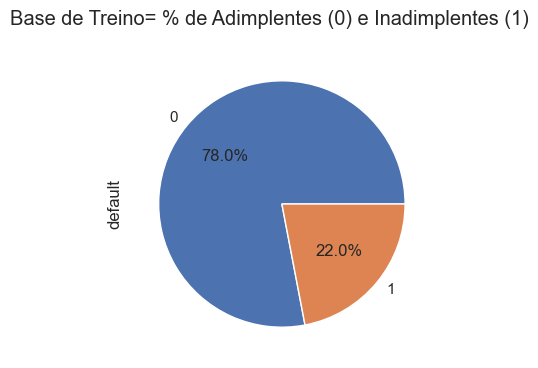

In [17]:
# Plot
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Base de Treino= % de Adimplentes (0) e Inadimplentes (1)')
y_train['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [18]:
print("Bases de teste = ", X_test.shape, y_test.shape)

Bases de teste =  (9000, 23) (9000, 1)


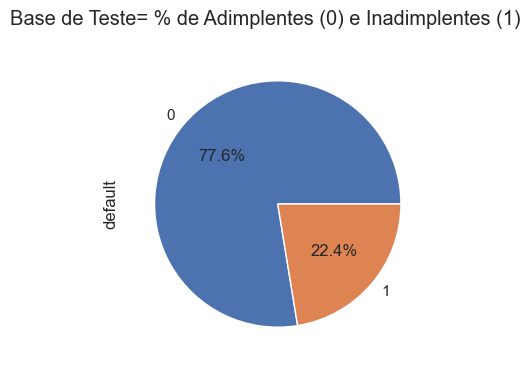

In [19]:
# Plot
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Base de Teste= % de Adimplentes (0) e Inadimplentes (1)')
y_test['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

### **<font color='red'>Criando uma função para cálculo das métricas KS e ROC-AUC:</font>**

In [20]:
def ks_and_roc_auc(y_realizado, y_probabilidade):
    df = pd.DataFrame()
    df['realizado'] = y_realizado
    df['probabilidade'] = y_probabilidade[:, 1]
    
    class0 = df[df['realizado'] == 0]
    class1 = df[df['realizado'] == 1]
    
    ks = ks_2samp(class0['probabilidade'], class1['probabilidade'])
    roc_auc = roc_auc_score(df['realizado'] , df['probabilidade'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.4e})")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    return ks.statistic, roc_auc

### **<font color='darkblue'>4- CRIAÇÃO E AVALIAÇÃO DOS MODELOS DE CLASSIFICAÇÃO</font>**

Esta versão de cada modelo será criada usando os hiperparâmetros pré-definidos pelos algoritmos em seus frameworks.

### **<font color='orangered'>Modelo 1: Árvore de decisão</font>**

In [21]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier().fit(X_train, y_train)

# Predição
arvore_pred = arvore.predict(X_test)

# Probabilidades
arvore_probabilities = arvore.predict_proba(X_test)

# Resultados
print("Acurácia = ", accuracy_score(y_test, arvore_pred))
print("F1 Score= ", f1_score(y_test, arvore_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, arvore_probabilities)

Acurácia =  0.7192222222222222
F1 Score=  0.3944404505152169
KS: 0.2180 (p-value: 1.0387e-65)
ROC-AUC: 0.6090


<Axes: >

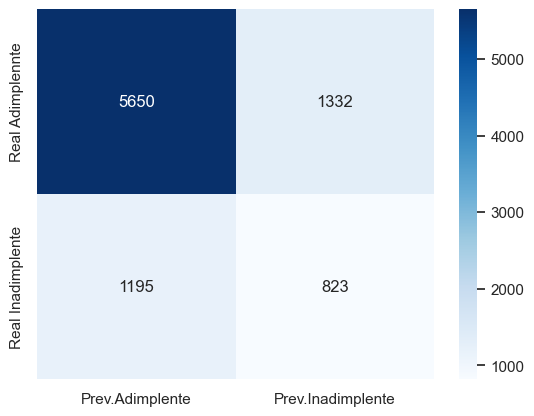

In [22]:
cm_arvore = confusion_matrix(y_test, arvore_pred)
cmatrix_arvore = pd.DataFrame(data = cm_arvore, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix_arvore, annot=True, fmt='d', cmap='Blues')

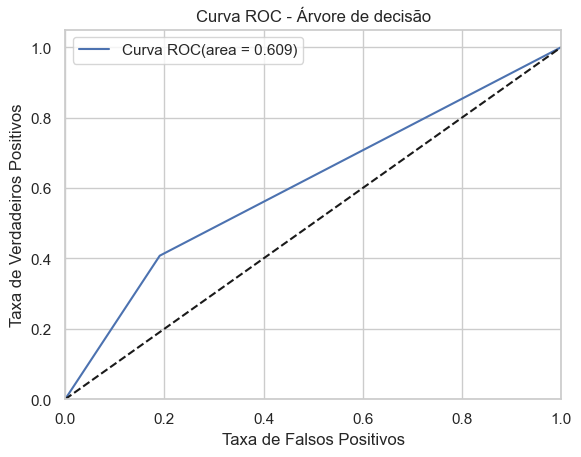

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, arvore_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Árvore de decisão')
plt.legend()
plt.show()

In [24]:
# Targets
targets_model = pd.DataFrame(arvore_pred, columns=['Target_Arvore'], index=[X_test.index])
targets_model = targets_model.reset_index()

# Probabilidades
result_probas = pd.DataFrame(arvore_probabilities, columns=['Prob_Adimplencia', 'Prob_Inadimplencia'], index=[X_test.index])
result_probabilities = result_probas.reset_index()

In [25]:
result_probas['Prob_Inadimplencia'].value_counts()

0.0    6834
1.0    2155
0.5      11
Name: Prob_Inadimplencia, dtype: int64

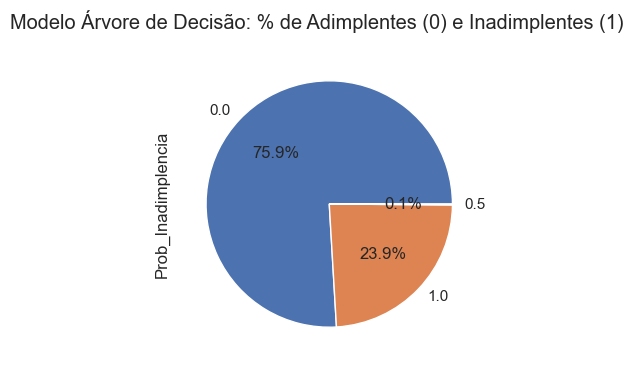

In [26]:
# Plot de cliente_local
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Modelo Árvore de Decisão: % de Adimplentes (0) e Inadimplentes (1)')
result_probas['Prob_Inadimplencia'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

### **<font color='orangered'>Modelo 2: Random Forest</font>**

In [27]:
# Criação e treinamento do modelo
random = RandomForestClassifier().fit(X_train, y_train)

# Predição
random_pred = random.predict(X_test)

# Probabilidades
random_probabilities = random.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, random_pred))
print("F1 Score= ", f1_score(y_test, random_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, random_probabilities)

Resultados:
Acurácia =  0.8142222222222222
F1 Score=  0.46615581098339715
KS: 0.4087 (p-value: 3.4225e-235)
ROC-AUC: 0.7669


<Axes: >

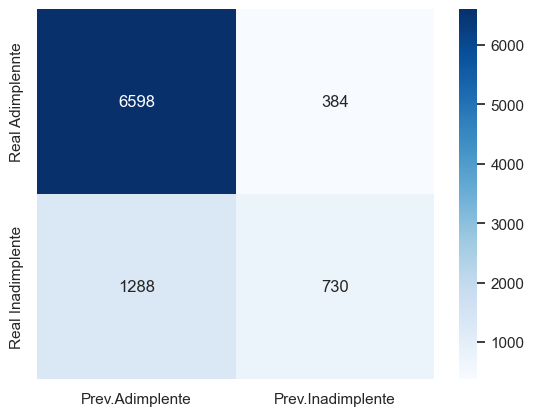

In [28]:
cm_random = confusion_matrix(y_test, random_pred)
cmatrix_random = pd.DataFrame(data = cm_random, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix_random, annot=True, fmt='d', cmap='Blues')

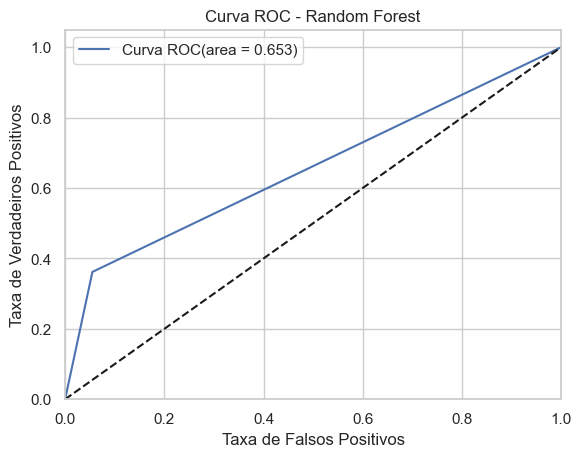

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, random_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

In [30]:
# Targets
targets_model2 = pd.DataFrame(random_pred, columns=['Target_Random'], index=[X_test.index])
targets_model2 = targets_model.reset_index()

# Probabilidades
result_probas2 = pd.DataFrame(random_probabilities, columns=['Prob_Adimplencia', 'Prob_Inadimplencia'], index=[X_test.index])
result_probabilities2 = result_probas2.reset_index()

In [31]:
result_probas2['Prob_Inadimplencia'].describe()

count    9000.000000
mean        0.232823
std         0.201111
min         0.000000
25%         0.090000
50%         0.170000
75%         0.300000
max         1.000000
Name: Prob_Inadimplencia, dtype: float64

### **<font color='orangered'>Modelo 3: Bagging</font>**

In [32]:
# Criação e treinamento do modelo
bagging = BaggingClassifier().fit(X_train, y_train)

# Predição
bagging_pred = bagging.predict(X_test)

# Probabilidades
bagging_probabilities = bagging.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, bagging_pred))
print("F1 Score= ", f1_score(y_test, bagging_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, bagging_probabilities)

Resultados:
Acurácia =  0.8032222222222222
F1 Score=  0.43688394276629566
KS: 0.3447 (p-value: 8.8760e-166)
ROC-AUC: 0.7265


<Axes: >

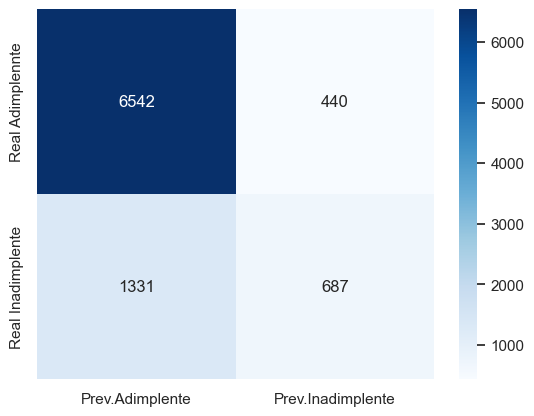

In [33]:
cm3 = confusion_matrix(y_test, bagging_pred)
cmatrix3 = pd.DataFrame(data = cm3, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix3, annot=True, fmt='d', cmap='Blues')

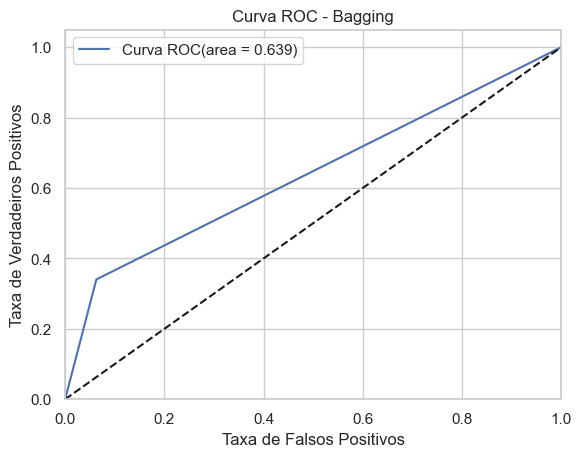

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, bagging_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Bagging')
plt.legend()
plt.show()

### **<font color='orangered'>Modelo 4: AdaBoost</font>**

In [35]:
# Criação e treinamento do modelo
adaB = AdaBoostClassifier().fit(X_train, y_train)

# Predição
ada_pred = adaB.predict(X_test)

# Probabilidades
ada_probabilities = adaB.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, ada_pred))
print("F1 Score= ", f1_score(y_test, ada_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, ada_probabilities)

Resultados:
Acurácia =  0.8187777777777778
F1 Score=  0.4450493365090167
KS: 0.4237 (p-value: 2.2762e-253)
ROC-AUC: 0.7776


<Axes: >

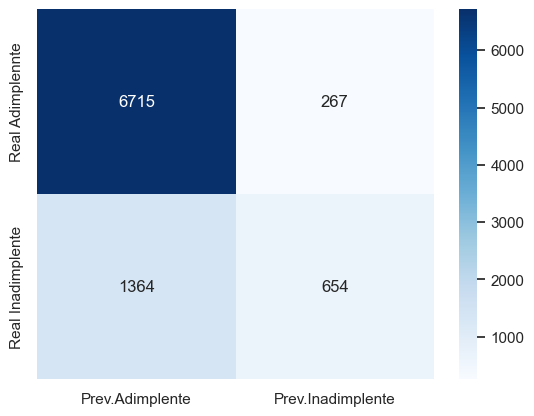

In [36]:
cm4 = confusion_matrix(y_test, ada_pred)
cmatrix4 = pd.DataFrame(data = cm4, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix4, annot=True, fmt='d', cmap='Blues')

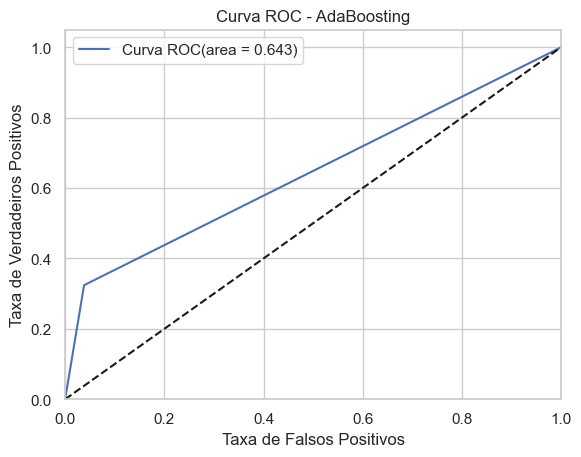

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, ada_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - AdaBoosting')
plt.legend()
plt.show()

### **<font color='orangered'>Modelo 5: Extremely Randomized Forest (Extra Trees)</font>**

In [38]:
# Criação e treinamento do modelo
extratrees = ExtraTreesClassifier().fit(X_train, y_train)

# Predição
extra_pred = extratrees.predict(X_test)

# Probabilidades
extra_probabilities = extratrees.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, extra_pred))
print("F1 Score= ", f1_score(y_test, extra_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, extra_probabilities)

Resultados:
Acurácia =  0.8088888888888889
F1 Score=  0.4584382871536524
KS: 0.3939 (p-value: 5.7358e-218)
ROC-AUC: 0.7572


<Axes: >

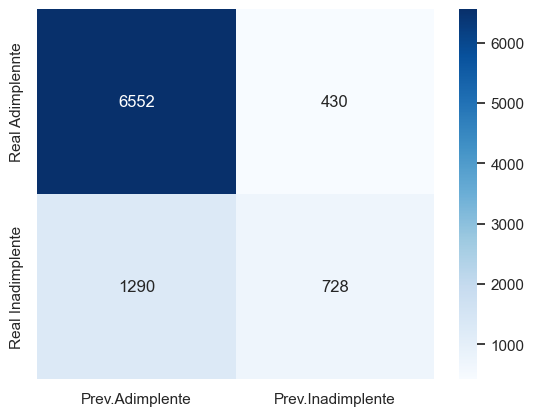

In [39]:
cm5 = confusion_matrix(y_test, extra_pred)
cmatrix5 = pd.DataFrame(data = cm5, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix5, annot=True, fmt='d', cmap='Blues')

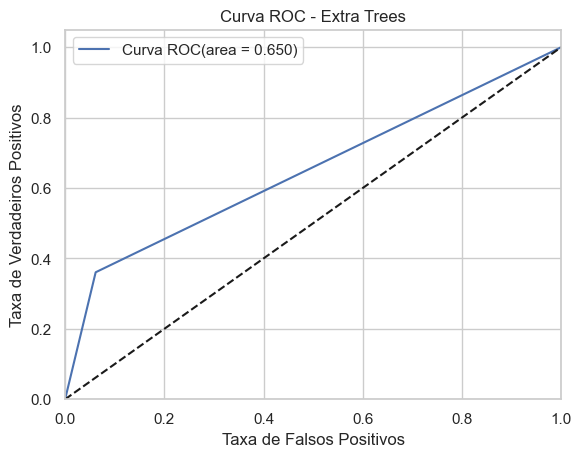

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, extra_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Extra Trees')
plt.legend()
plt.show()

### **<font color='orangered'>Modelo 6: GradientBoosting</font>**

In [41]:
# Criação e treinamento do modelo
gboost = GradientBoostingClassifier().fit(X_train, y_train)

# Predição
gboost_pred = gboost.predict(X_test)

# Probabilidades
gb_probabilities = gboost.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, gboost_pred))
print("F1 Score= ", f1_score(y_test, gboost_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, gb_probabilities)

Resultados:
Acurácia =  0.8202222222222222
F1 Score=  0.4726205997392438
KS: 0.4396 (p-value: 1.5269e-273)
ROC-AUC: 0.7859


<Axes: >

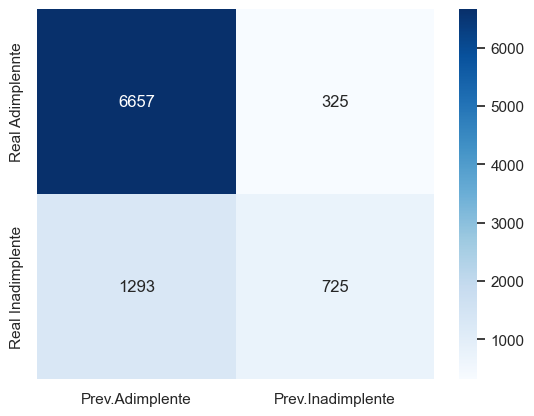

In [42]:
cm6 = confusion_matrix(y_test, gboost_pred)
cmatrix6 = pd.DataFrame(data = cm6, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix6, annot=True, fmt='d', cmap='Blues')

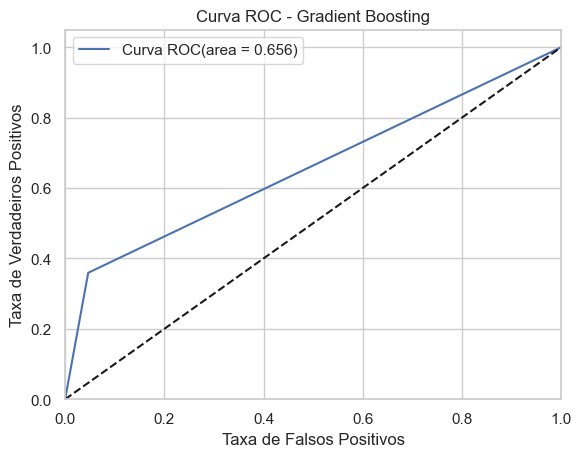

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, gboost_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Gradient Boosting')
plt.legend()
plt.show()

### **<font color='orangered'>Modelo 7: LightGBM</font>**

In [44]:
# Criação e treinamento do modelo
lboost = LGBMClassifier().fit(X_train, y_train)

# Predição
lboost_pred = lboost.predict(X_test)

# Probabilidades
lg_probabilities = lboost.predict_proba(X_test)

# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, lboost_pred))
print("F1 Score= ", f1_score(y_test, lboost_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, lg_probabilities)

Resultados:
Acurácia =  0.8223333333333334
F1 Score=  0.48235674975720294
KS: 0.4282 (p-value: 4.8826e-259)
ROC-AUC: 0.7814


<Axes: >

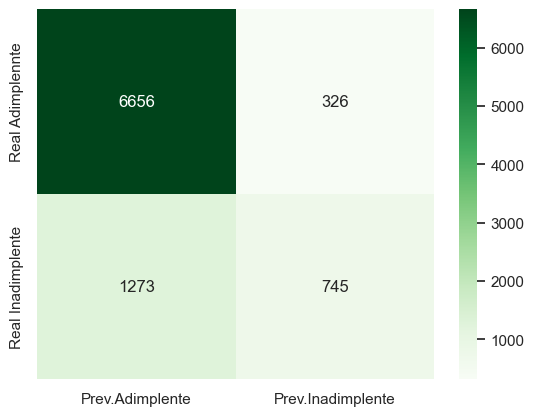

In [45]:
cm7 = confusion_matrix(y_test, lboost_pred)
cmatrix7 = pd.DataFrame(data = cm7, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix7, annot=True, fmt='d', cmap='Greens')

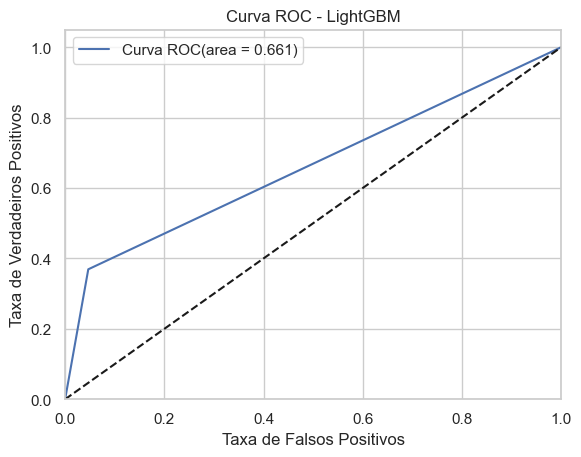

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, lboost_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - LightGBM')
plt.legend()
plt.show()

### **<font color='orangered'>Modelo 8: CatBoost</font>**

In [47]:
# Criação e treinamento do modelo
cboost = CatBoostClassifier().fit(X_train, y_train)

# Predição
cboost_pred = cboost.predict(X_test)

# Probabilidades
cat_probabilities = cboost.predict_proba(X_test)

Learning rate set to 0.037803
0:	learn: 0.6719635	total: 101ms	remaining: 1m 40s
1:	learn: 0.6521040	total: 114ms	remaining: 56.9s
2:	learn: 0.6341963	total: 126ms	remaining: 41.8s
3:	learn: 0.6176670	total: 136ms	remaining: 33.8s
4:	learn: 0.6026227	total: 147ms	remaining: 29.2s
5:	learn: 0.5885465	total: 161ms	remaining: 26.7s
6:	learn: 0.5759051	total: 174ms	remaining: 24.7s
7:	learn: 0.5645383	total: 188ms	remaining: 23.3s
8:	learn: 0.5535069	total: 201ms	remaining: 22.1s
9:	learn: 0.5441477	total: 212ms	remaining: 21s
10:	learn: 0.5354235	total: 221ms	remaining: 19.8s
11:	learn: 0.5274319	total: 230ms	remaining: 18.9s
12:	learn: 0.5198664	total: 238ms	remaining: 18.1s
13:	learn: 0.5124658	total: 246ms	remaining: 17.3s
14:	learn: 0.5062213	total: 254ms	remaining: 16.7s
15:	learn: 0.5003044	total: 262ms	remaining: 16.1s
16:	learn: 0.4949257	total: 270ms	remaining: 15.6s
17:	learn: 0.4899242	total: 278ms	remaining: 15.1s
18:	learn: 0.4855284	total: 285ms	remaining: 14.7s
19:	learn: 0

162:	learn: 0.4125619	total: 1.43s	remaining: 7.34s
163:	learn: 0.4124922	total: 1.44s	remaining: 7.32s
164:	learn: 0.4124153	total: 1.44s	remaining: 7.31s
165:	learn: 0.4123791	total: 1.46s	remaining: 7.35s
166:	learn: 0.4123077	total: 1.47s	remaining: 7.35s
167:	learn: 0.4121688	total: 1.48s	remaining: 7.33s
168:	learn: 0.4120811	total: 1.49s	remaining: 7.32s
169:	learn: 0.4119793	total: 1.5s	remaining: 7.31s
170:	learn: 0.4118264	total: 1.5s	remaining: 7.3s
171:	learn: 0.4117289	total: 1.51s	remaining: 7.29s
172:	learn: 0.4116307	total: 1.52s	remaining: 7.28s
173:	learn: 0.4115601	total: 1.53s	remaining: 7.26s
174:	learn: 0.4114125	total: 1.54s	remaining: 7.25s
175:	learn: 0.4113109	total: 1.54s	remaining: 7.24s
176:	learn: 0.4111711	total: 1.55s	remaining: 7.22s
177:	learn: 0.4110488	total: 1.56s	remaining: 7.21s
178:	learn: 0.4109770	total: 1.57s	remaining: 7.2s
179:	learn: 0.4108990	total: 1.58s	remaining: 7.18s
180:	learn: 0.4107709	total: 1.58s	remaining: 7.17s
181:	learn: 0.41

346:	learn: 0.3943397	total: 2.88s	remaining: 5.42s
347:	learn: 0.3942072	total: 2.89s	remaining: 5.41s
348:	learn: 0.3941267	total: 2.9s	remaining: 5.4s
349:	learn: 0.3940290	total: 2.9s	remaining: 5.39s
350:	learn: 0.3939849	total: 2.91s	remaining: 5.38s
351:	learn: 0.3938913	total: 2.92s	remaining: 5.37s
352:	learn: 0.3937490	total: 2.92s	remaining: 5.36s
353:	learn: 0.3936328	total: 2.93s	remaining: 5.35s
354:	learn: 0.3935268	total: 2.94s	remaining: 5.34s
355:	learn: 0.3934645	total: 2.95s	remaining: 5.33s
356:	learn: 0.3933688	total: 2.96s	remaining: 5.32s
357:	learn: 0.3933026	total: 2.96s	remaining: 5.32s
358:	learn: 0.3931521	total: 2.97s	remaining: 5.31s
359:	learn: 0.3930440	total: 2.98s	remaining: 5.3s
360:	learn: 0.3929192	total: 2.99s	remaining: 5.29s
361:	learn: 0.3928042	total: 3s	remaining: 5.28s
362:	learn: 0.3926968	total: 3s	remaining: 5.27s
363:	learn: 0.3925870	total: 3.01s	remaining: 5.26s
364:	learn: 0.3925216	total: 3.02s	remaining: 5.25s
365:	learn: 0.3924356	

507:	learn: 0.3791830	total: 4.13s	remaining: 4s
508:	learn: 0.3791417	total: 4.13s	remaining: 3.99s
509:	learn: 0.3790776	total: 4.14s	remaining: 3.98s
510:	learn: 0.3789844	total: 4.15s	remaining: 3.97s
511:	learn: 0.3789413	total: 4.16s	remaining: 3.96s
512:	learn: 0.3788826	total: 4.16s	remaining: 3.95s
513:	learn: 0.3787502	total: 4.17s	remaining: 3.94s
514:	learn: 0.3786048	total: 4.18s	remaining: 3.94s
515:	learn: 0.3784948	total: 4.19s	remaining: 3.93s
516:	learn: 0.3784223	total: 4.2s	remaining: 3.92s
517:	learn: 0.3784009	total: 4.2s	remaining: 3.91s
518:	learn: 0.3783392	total: 4.21s	remaining: 3.9s
519:	learn: 0.3782763	total: 4.22s	remaining: 3.89s
520:	learn: 0.3782039	total: 4.23s	remaining: 3.88s
521:	learn: 0.3781594	total: 4.23s	remaining: 3.88s
522:	learn: 0.3780140	total: 4.24s	remaining: 3.87s
523:	learn: 0.3779377	total: 4.25s	remaining: 3.86s
524:	learn: 0.3778455	total: 4.26s	remaining: 3.85s
525:	learn: 0.3778173	total: 4.26s	remaining: 3.84s
526:	learn: 0.3777

667:	learn: 0.3661483	total: 5.36s	remaining: 2.67s
668:	learn: 0.3660225	total: 5.37s	remaining: 2.66s
669:	learn: 0.3660077	total: 5.38s	remaining: 2.65s
670:	learn: 0.3659635	total: 5.39s	remaining: 2.64s
671:	learn: 0.3659016	total: 5.39s	remaining: 2.63s
672:	learn: 0.3658325	total: 5.4s	remaining: 2.63s
673:	learn: 0.3657415	total: 5.41s	remaining: 2.62s
674:	learn: 0.3656837	total: 5.42s	remaining: 2.61s
675:	learn: 0.3656172	total: 5.43s	remaining: 2.6s
676:	learn: 0.3655546	total: 5.43s	remaining: 2.59s
677:	learn: 0.3654900	total: 5.44s	remaining: 2.58s
678:	learn: 0.3654287	total: 5.45s	remaining: 2.58s
679:	learn: 0.3653299	total: 5.46s	remaining: 2.57s
680:	learn: 0.3652309	total: 5.47s	remaining: 2.56s
681:	learn: 0.3651609	total: 5.47s	remaining: 2.55s
682:	learn: 0.3651255	total: 5.48s	remaining: 2.54s
683:	learn: 0.3650763	total: 5.49s	remaining: 2.54s
684:	learn: 0.3649913	total: 5.5s	remaining: 2.53s
685:	learn: 0.3648906	total: 5.5s	remaining: 2.52s
686:	learn: 0.36

852:	learn: 0.3526125	total: 6.81s	remaining: 1.17s
853:	learn: 0.3525435	total: 6.82s	remaining: 1.17s
854:	learn: 0.3524504	total: 6.83s	remaining: 1.16s
855:	learn: 0.3523618	total: 6.83s	remaining: 1.15s
856:	learn: 0.3522883	total: 6.84s	remaining: 1.14s
857:	learn: 0.3521816	total: 6.85s	remaining: 1.13s
858:	learn: 0.3521189	total: 6.86s	remaining: 1.13s
859:	learn: 0.3520353	total: 6.86s	remaining: 1.12s
860:	learn: 0.3519103	total: 6.87s	remaining: 1.11s
861:	learn: 0.3518787	total: 6.88s	remaining: 1.1s
862:	learn: 0.3518000	total: 6.89s	remaining: 1.09s
863:	learn: 0.3517228	total: 6.89s	remaining: 1.08s
864:	learn: 0.3516762	total: 6.9s	remaining: 1.08s
865:	learn: 0.3516022	total: 6.91s	remaining: 1.07s
866:	learn: 0.3515351	total: 6.92s	remaining: 1.06s
867:	learn: 0.3515086	total: 6.92s	remaining: 1.05s
868:	learn: 0.3514559	total: 6.93s	remaining: 1.04s
869:	learn: 0.3514015	total: 6.94s	remaining: 1.04s
870:	learn: 0.3513176	total: 6.95s	remaining: 1.03s
871:	learn: 0.

In [48]:
# Resultados
print("Resultados:")
print("Acurácia = ", accuracy_score(y_test, cboost_pred))
print("F1 Score= ", f1_score(y_test, cboost_pred))
ks_outcome, auc_outcome = ks_and_roc_auc(y_test, cat_probabilities)

Resultados:
Acurácia =  0.8222222222222222
F1 Score=  0.4835377663008393
KS: 0.4338 (p-value: 4.4494e-266)
ROC-AUC: 0.7854


<Axes: >

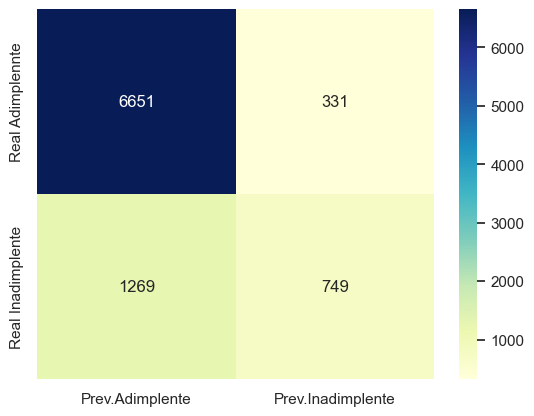

In [49]:
cm8 = confusion_matrix(y_test, cboost_pred)
cmatrix8 = pd.DataFrame(data = cm8, columns=['Prev.Adimplente', 'Prev.Inadimplente'], index=['Real Adimplennte', 'Real Inadimplente'])
sns.heatmap(cmatrix8, annot=True, fmt='d', cmap='YlGnBu')

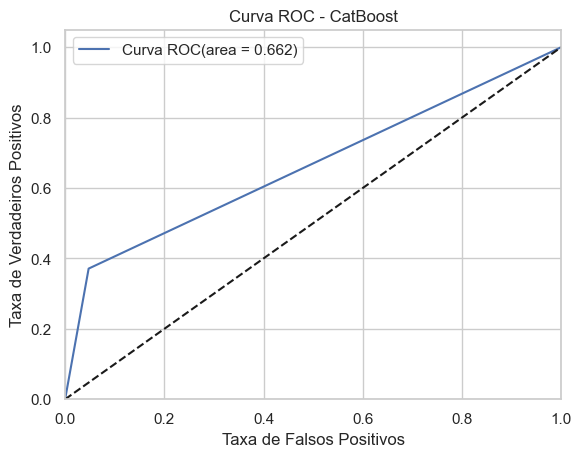

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, cboost_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Curva ROC(area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - CatBoost')
plt.legend()
plt.show()

In [51]:
# Targets
targets_model8 = pd.DataFrame(cboost_pred, columns=['Target_CatBoost'], index=[X_test.index])
targets_model8 = targets_model8.reset_index()

# Probabilidades
result_probas8 = pd.DataFrame(cat_probabilities, columns=['Prob_Adimplencia', 'Prob_Inadimplencia'], index=[X_test.index])
result_probabilities8 = result_probas8.reset_index()

In [52]:
result_probas8['Prob_Inadimplencia'].describe()

count    9000.000000
mean        0.218114
std         0.204635
min         0.003046
25%         0.084550
50%         0.139592
75%         0.261298
max         0.958045
Name: Prob_Inadimplencia, dtype: float64

### **<font color='darkblue'>4 - RANKING DA 1ª VERSÃO DOS MODELOS PARA CLASSIFICAÇÃO DE RISCO DE CRÉDITO</font>**

Usando os parâmetros e hiperparâmetros definidos, por padrão, pelos algoritmos selecionados, ou seja, sem fazer nenhum tipo de ajuste (como tunning dos hiperparâmetros), os melhores resultados foram obtidos com o **LightGBM** (Acurácia), **CatBoost** (F1 Score) e **Gradient Boosting** (Teste KS).

Métrica: **Acurácia**
- 1º) LightGBM          = 0.8223
- 2º) CatBoost          = 0.8222
- 3º) Gradient Boosting = 0.8202
- 4º) AdaBoost          = 0.8188
- 5º) Random Forest     = 0.8142
- 6º) Extra Trees       = 0.8089
- 7º) Bagging           = 0.8032
- 8º) Árvore de decisão = 0.7192

Métrica: **F1 Score**
- 1º) CatBoost          = 0.4835
- 2º) LightGBM          = 0.4824
- 3º) Gradient Boosting = 0.4726
- 4º) Random Forest     = 0.4662
- 5º) Extra Trees       = 0.4584
- 6º) AdaBoost          = 0.4450
- 7º) Bagging           = 0.4369
- 8º) Árvore de decisão = 0.3944

Métrica: **Teste KS**
- 1º) Gradient Boosting = 0.4396
- 2º) CatBoost          = 0.4338
- 3º) LightGBM          = 0.4282
- 4º) AdaBoost          = 0.4237
- 5º) Random Forest     = 0.4087
- 6º) Extra Trees       = 0.3939
- 7º) Bagging           = 0.3447
- 8º) Árvore de decisão = 0.2180

### **<font color='darkblue'>5 - PRÓXIMOS PASSOS</font>**

Os próximos passos serão a) executar a mesma base de dados com modelos de redes neurais artificiais profundas; e b) fazer ajustes de hiperparâmetros em todos os algoritmos para descobrirmos o quanto de otimização cada um apresentará.